# Assignment #4 - Neural Networks

### <font color="red"> DUE: Apr 16 (Monday) 11:00 pm </font>  

Rohini Isarapu


# I. Overview

The objective of this assignment is to implement logistic regression classifier using Neural Network. These models are trained using a K- cross validation.The results obtained from Neural network would be compared with classification algorithms(Linear logistic regression, QDA, LDA and logistic regression).

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from pandas.tools import plotting
import matplotlib.pyplot as plt
from IPython.core.debugger import Tracer
from copy import deepcopy as copy 
%matplotlib inline

# II. Data

The dataset “Deaths in United States” consists of a CSV file with 30 features and about 27 lakh rows. It consists of all the deaths which occurred in the year 2015 across United States with a precise information about the details of the death and statistical background of the departed. We can analyze the circumstances and how the death in U.S is different from other countries. The death reports are accurate as it is released by CDC (Centers for disease control and prevention) under the National Vital Statistics System.

Some of the important columns include:

• Month_of_death

• Sex

• Place of death

• Marital Status

• Manner of death

• Method of Disposition

The attribute values consist of numeric as well as strings.

Removed few columns as it the information was repetitive and I found no significance in regards with the analyzation of the deaths based on gender.

Encoded zeros and ones for Male and Female.
0: Male
1: Female

Encoded the values of the column "manner_of_death" as follows:
1:Accident
2:Suicide
3:Homicide
4:Pending investigation
5:Could not determine
6:Self-Inflicted
7:Natural
0:Not specified

The column "manner_of_death" had missing values. Replaced all the missing values with zeros.

Eliminated the rows where the age is greater than 100.


In [22]:
UsDeaths = pd.read_csv("C:/Users/isara/Documents/2015_data.csv",nrows = 5000)

In [23]:
new_UsDeaths_Data=UsDeaths.drop(['education_1989_revision','education_2003_revision','education_reporting_flag','detail_age_type',
                       'age_substitution_flag','age_recode_52','age_recode_27','infant_age_recode_22','current_data_year','activity_code',
                       'icd_code_10th_revision','358_cause_recode','113_cause_recode','130_infant_cause_recode','39_cause_recode',
                       'number_of_entity_axis_conditions','entity_condition_1','entity_condition_2','entity_condition_3','entity_condition_4',
                       'entity_condition_5','entity_condition_6','entity_condition_7','entity_condition_8','entity_condition_9','entity_condition_10',
            'entity_condition_11','entity_condition_12','entity_condition_13','entity_condition_14','entity_condition_15','entity_condition_16','entity_condition_17','entity_condition_18',
                       'entity_condition_19','entity_condition_20','number_of_record_axis_conditions','record_condition_1',
                       'record_condition_2','record_condition_3','record_condition_4','record_condition_5','record_condition_6',
                       'record_condition_7','record_condition_8','record_condition_9','record_condition_10','record_condition_11','record_condition_12','record_condition_13',
                       'record_condition_14','record_condition_15','record_condition_16','record_condition_17','record_condition_18','record_condition_19',
                       'record_condition_20','race','bridged_race_flag','race_imputation_flag','race_recode_3','hispanic_origin','place_of_injury_for_causes_w00_y34_except_y06_and_y07_'],axis=1)

new_UsDeaths_Data = new_UsDeaths_Data[new_UsDeaths_Data.detail_age < 100][new_UsDeaths_Data.day_of_week_of_death< 8]
print(new_UsDeaths_Data)

      resident_status  month_of_death sex  detail_age  age_recode_12  \
0                   1               1   M          84             10   
1                   1               1   M          70              9   
2                   1               1   F          91             11   
3                   1               1   F          40              6   
4                   1               1   F          89             11   
5                   1               1   M          78             10   
6                   1               1   M          92             11   
7                   1               1   M          82             10   
8                   1               1   F          89             11   
9                   1               1   F          93             11   
10                  1               1   F          84             10   
11                  1               1   F          84             10   
12                  1               1   F          67           

C:\Users\isara\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


In [24]:
nans=new_UsDeaths_Data.isnull().any()
nans

resident_status                        False
month_of_death                         False
sex                                    False
detail_age                             False
age_recode_12                          False
place_of_death_and_decedents_status    False
marital_status                         False
day_of_week_of_death                   False
injury_at_work                         False
manner_of_death                         True
method_of_disposition                  False
autopsy                                False
race_recode_5                          False
hispanic_originrace_recode             False
dtype: bool

[Text(0,0,'1.0'),
 Text(0,0,'2.0'),
 Text(0,0,'3.0'),
 Text(0,0,'4.0'),
 Text(0,0,'5.0'),
 Text(0,0,'7.0')]

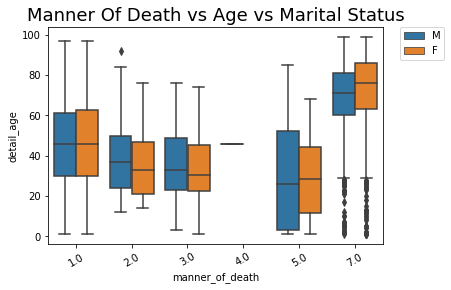

In [25]:
plt.title('Manner Of Death vs Age vs Marital Status', fontsize=18)
ax=sns.boxplot(x="manner_of_death",y="detail_age",hue="sex",data=new_UsDeaths_Data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [26]:
print(new_UsDeaths_Data.dtypes)

resident_status                          int64
month_of_death                           int64
sex                                     object
detail_age                               int64
age_recode_12                            int64
place_of_death_and_decedents_status      int64
marital_status                          object
day_of_week_of_death                     int64
injury_at_work                          object
manner_of_death                        float64
method_of_disposition                   object
autopsy                                 object
race_recode_5                            int64
hispanic_originrace_recode               int64
dtype: object


In [27]:
new_UsDeaths_Data.sex=new_UsDeaths_Data.sex.replace({'M':0,'F':1})

In [28]:
new_UsDeaths_Data['sex']=new_UsDeaths_Data['sex'].astype(np.int64)

In [29]:
new_UsDeaths_Data['manner_of_death']=new_UsDeaths_Data['manner_of_death'].fillna(0)

In [30]:
new_UsDeaths_Data['manner_of_death']=new_UsDeaths_Data['manner_of_death'].astype(np.int64)

In [31]:
Features = ["manner_of_death","detail_age"]
XX=new_UsDeaths_Data.loc[:,Features].as_matrix()
TT = np.array(new_UsDeaths_Data.loc[:,'sex'])
new_UsDeaths_DataShuffle = new_UsDeaths_Data.iloc[np.random.permutation(len(new_UsDeaths_Data))]
X = new_UsDeaths_DataShuffle.loc[:,Features].as_matrix()
T = np.array(new_UsDeaths_DataShuffle.loc[:,'sex'])
Classes = [(new_UsDeaths_Data.loc[new_UsDeaths_Data['sex'] == 0], 'M'),
                     (new_UsDeaths_Data.loc[new_UsDeaths_Data['sex'] == 1], 'F')]

# III. Methods

Neural Networks:

Single layer percepton cannot be used for complex non-linear problems because computing and calculating from so many inputs and their sub parameters is not just possible through one neuron. Therefore,MultiLayer Perceptron comes into picture.
The Neural Network consists of:
1)Input Layer: The input nodes provide information from the outside world to the network.
2)Hidden Layer: They perform calculations and transfer the information from the input nodes to the output nodes.
3)Output Nodes: They are responsible for computations and transferring information from network to the outside world.

Non Linear Regression:

The key difference between a linear and a non linear classifer is that the summation of the weighted sum is directly not applied to the activation function(here softmax function).The non linear model will have another layer or layers of neural network where in the inputs are fed, weighted sum is calculated and then softmax function is applied to find the probability of the class.

Mathematically, we can represent a linear model as follows:
                               Z = h(X1.V)
                               Y = Z1. W 
where h = activation function
      X1 = Bias column with one's
      W = Weight vector
      Z1 = Bias column with one's
      
The non linear moedel takes Y and then activation function is applied on it. As aresult of this we get new input G.

Non Linear Logistic Regression:

The NeuralNet(nn.py) is used as a super class.

The _init_() method takes the input as array and sets the standardization to target to false.
The forward() method takes the input X and the output is obtained from NeuralNetForward() method. The softmax function is applied to the output to return Z. 
The _object() method  reflects the likelihood function of logistic regression.
The train() method converts the vector label T to indicator variable and feed that for training.
Since we now have probabilities and for each label, in the use() method we use argmax to find out the class with highest probability/likelihood.

Preliminary Test:

For the preliminary test purpose, the input X has 2 features per sample and the target variables are already indicator variables.I have given NeuralNetLogReg class 2 inputs, 4 hidden layers and 2 outputs. The code uses NeuralNetLogReg.

K-Cross Validation:

In order to avoid overfitting, cross validation technique. In this assignment, the data set is split into 5 folds. 
1. Divide the data set into n folds(here 5 folds)
2. Hold out one fold as test set and use the others as training set.
3. Train and record the test set result.
4. Perform step 2 and 3 by considering each fold as a test set.
5. The model with the highest accuracy was assigned to the corresponding test set and used as a training set to train another model.


In [32]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    
    def __init__(self, nunits):
        NeuralNet.__init__(self,nunits)
        self.stdTarget = False
        
    def forward(self, X):
        def soft_max(z):
            return  np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)
        t, Z = NeuralNet.forward(self, X)
        t = soft_max(t)
        return t, Z
    
    def _errorf(self, T, Y):
        return NeuralNet._errorf(self, T, Y)

    def _objectf(self, T, Y, wpenalty):
        return -np.sum(T*np.log(Y)) + wpenalty

    def train(self, X, T, **params):
        if(len(T.shape) > 1): 
            if(T.shape[1] > 1):
                return NeuralNet.train(self, X, T, **params)
            T = T.flatten() 
        uniqueItems = np.unique(T) 
        T1 = (T[:,None] == uniqueItems).astype(int) 
        return NeuralNet.train(self, X, T1, **params) 


    def use(self, X):
        Y = NeuralNet.use(self,X)
        return np.argmax(Y,1),Y


In [33]:
### Preliminary Test
import numpy
X = np.array([0,1,1,0,1,1]).reshape(3,2)
T = np.array([1,1,1,1,0,0]).reshape(3,2)
nn = NeuralNetLogReg([2,4,2])
nn.train(X,T)
Y = nn.use(X)
print(T, Y)

[[1 1]
 [1 1]
 [0 0]] (array([1, 0, 0], dtype=int64), array([[ 0.49521113,  0.50478887],
       [ 0.50438556,  0.49561444],
       [ 0.50245935,  0.49754065]]))


C:\Users\isara\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
C:\Users\isara\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


In [34]:
def CrossValidate(X, T, modelClass, parameters=None):
    K = 5 
    finalRecords = []
    XP = np.array_split(X,K)
    TP = np.array_split(T,K)
    bestParameter = None
    
    for test in range(K): 
        records = []
        Xtest = XP[test]
        Ttest = TP[test]
        
        if parameters is None:
            bestModel = modelClass()
        else:
            for val in range(K): 
                if test == val:
                    continue

                Xval = XP[val]
                Tval = TP[val]

                Xtrain = np.concatenate([x for i,x in enumerate(XP) if i!=val and i!=test])
                Ttrain = np.concatenate([x for i,x in enumerate(TP) if i!=val and i!=test])

                for param in parameters:
                    model = modelClass(param)
                    model.train(Xtrain,Ttrain)
                    pred,_ = model.use(Xval)
                    valAcc = accuracy(pred,Tval)
                    records.append((valAcc,param))
                    
            records = np.array(pd.DataFrame(records))
            bestParameter = records[np.argmax(records[:,0])][1]
            bestModel = modelClass(bestParameter)
        
        Xtrain = np.concatenate([x for i,x in enumerate(XP) if i!=test])
        Ttrain = np.concatenate([x for i,x in enumerate(TP) if i!=test])
        
        bestModel.train(Xtrain,Ttrain)
        finalPred,_ = bestModel.use(Xtest)
        finalAcc = accuracy(finalPred, Ttest)
        finalRecords.append((finalAcc,bestParameter))
    
    return np.array(pd.DataFrame(finalRecords))

In [35]:
def confusion_matrix(Y, T):
    if len(Y) != len(T):
        raise ValueError("Wrong prediction and target length!")
    
    classes = np.unique(T)
    n_classes = len(classes)
    
    cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
    Tidx = [T == c for c in classes]
    for c in classes:
        pred_idx = Y == c
        cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]
    
    return cfm

def Precision(cfm):
    cfm = cfm.as_matrix()
    return cfm[1, 1] / (cfm[1, 1] + cfm[1, 0])

def Recall(cfm):
    cfm = cfm.as_matrix()
    return cfm[1,1]/(cfm[1,1]+cfm[0,1])

def Specificity(cfm):
    cfm = cfm.as_matrix()
    return cfm[0,0]/(cfm[0,0]+cfm[1,0])

def accuracy(Y,T):
    return np.sum(Y == T)/len(Y)

def BestPlot(cv,best):
    display(pd.DataFrame(np.vstack((cv,best)),index=["0","1","2","3","4","Best"],columns=["Accuracy","Parameters"]))

def Predictions(Y,T):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(T, '.', color='b', label='Real') 
    ax.plot(Y, '.', color='r', label='Predicted')
    ax.set_xlabel('Index')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)
    plt.show()
    
def BestPlotStats(Y,T):
    cfm = confusion_matrix(Y,T)
    stats = [accuracy(Y,T),Precision(cfm),Recall(cfm),Specificity(cfm)]
    display(pd.DataFrame(stats,index=["Accuracy","Precision","Recall","Specificity"],columns=["Stats"]))
    Predictions(Y,T)
    return stats


### NonLinear Logistic Regression

In [36]:
import numpy as np
import abc

class LinearModel:
    def __init__(self):
        self.w = None

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    def add_ones(self, X):
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    @abc.abstractmethod
    def train(self, X, T):
        pass
    
    @abc.abstractmethod
    def use(self, X):
        pass 

class LinearRegress(LinearModel): 
   
    def __init__(self):
        LinearModel.__init__(self)
        
    def train(self, X, T):
        X1 = self.add_ones(X)
        self.w = np.linalg.lstsq(X1.T @ X1, X1.T @ T)[0]
    
    def use(self, X):
        Y = self.add_ones(X) @ self.w
        return Y

# IV - Results

I have taken the classifier algorithms such as Pocket Algorithm, QDA, LDA,logistic regression and compared it with the Non Linear Logistic Regression and Neural Networks. From the visualization, the highest accuracy is Logistic Regression and LDA. The values of Neural Network and Non linear logistic regression model is varying but both have a maximum accuracy of 61 percent. QDA has worst performance with accuracy of 35 percent only. I think the Nueral networks and linear regression have the same level of performance on my dataset. When comparing with other performance measures such as precision,recall and specificity Neural Netrworks and Linear Regression work the best. The accuracy can be increased by taking more number of rows from the dataset. I have taken only 5000 rows so as to decrease the execution time.

Cross Validation:


C:\Users\isara\Downloads\Assignment 4\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\isara\Downloads\Assignment 4\util.py:19: RuntimeWarning: divide by zero encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\isara\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
C:\Users\isara\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in long_scalars
C:\Users\isara\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
C:\Users\isara\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
C:\Users\isara\Anaconda3\lib\site-packages\ipykernel_launcher.py

,Accuracy,Parameters
0,0,"[2, 2]"
1,0,"[2, 2]"
2,2,"[2, 2]"
3,NaN,"[2, 4, 2]"
4,NaN,"[2, 4, 2]"
Best,2,"[2, 2]"


,Stats
Accuracy,0.602254
Precision,0.580284
Recall,0.354633
Specificity,0.797623


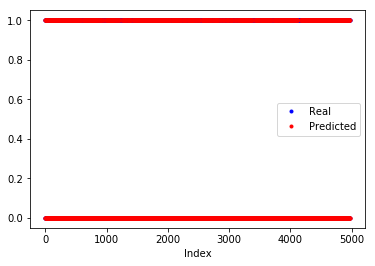

Linear Regression:


,Stats
Accuracy,0.606683
Precision,0.594422
Recall,0.340484
Specificity,0.816709


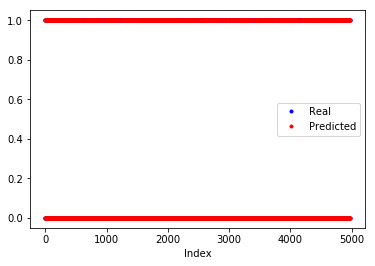

In [37]:
NFeatures = X.shape[1] 
NClass = len(np.unique(T)) 
layers = [[NFeatures,NClass], 
          [NFeatures,4,NClass],
          [NFeatures,16,NClass],
          [NFeatures,16,16,NClass]]

print("Cross Validation:")
NNLinRegCV= CrossValidate(X,T,NeuralNetLogReg, layers)
BestNNLinRegCV = NNLinRegCV[np.argmax(NNLinRegCV[:,0])]
BestPlot(NNLinRegCV,BestNNLinRegCV)

NNLinReg = NeuralNetLogReg(BestNNLinRegCV[1])
NNLinReg.train(XX,TT)
Y,_ = NNLinReg.use(XX)
NNLinearStats = BestPlotStats(Y,TT)

print("Linear Regression:")
LinReg = LinearRegress()
LinReg.train(XX,TT)
Y = np.round(LinReg.use(XX))
LinRegStats = BestPlotStats(Y,TT)

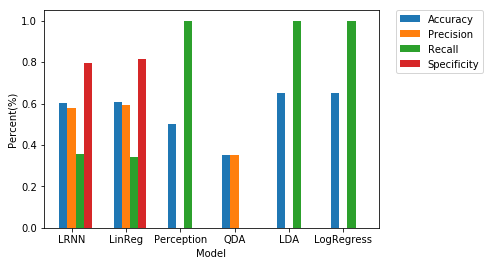

In [38]:
Labels = [("Accuracy",'r'),("Precision",'g'),("Recall",'b'),("Specificity",'c')]
PerceptionStats = [ 0.5,float('nan'),  1.0, 0.0 ]
QDAStats =  [ 0.35,  0.35,  0.00,  0.00]
LDAStats =  [ 0.65,  0.00,  1.00,  0.00]
LogRegressStats = [ 0.65,  0.00,  1.00,  0.00]

New_UsDeaths_DataStats = np.array([NNLinearStats,LinRegStats,PerceptionStats,QDAStats,LDAStats,LogRegressStats])

fig, ax = plt.subplots()
index = np.arange(New_UsDeaths_DataStats.shape[0])
bar_width = 0.15
for c in range(New_UsDeaths_DataStats.shape[1]):
    plt.bar(index+bar_width*c, New_UsDeaths_DataStats[:,c], bar_width,label=Labels[c][0])
plt.xlabel('Model')
plt.ylabel('Percent(%)')
plt.xticks(index + bar_width, ('LRNN','LinReg','Perception', 'QDA', 'LDA', 'LogRegress'))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Conclusions

It was difficult for me to understand the Neural Networks in the initial stages as it involves a lot of Mathematical computations. Also, understanding grad.py and nn.py was a little bit difficult. I always find it difficult to work with shapes and tend to spend a lot of time on it.

# Extra Credit

One extra credit is assigned when finish the following bullets. 

- Try nonlinear regression with neural networks and compare with linear regression model 
- Use cross validation to discover the best model and compare models. 

# TO START

- download [a4.tgz](http://webpages.uncc.edu/mlee173/teach/itcs4156/notebooks/assign/a4.tgz). 
- import the necessary classes or functions including NeuralNet.
- inherit NeuralNet and make NeuralNetLogReg

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Data | 
 | 2| Includes description of your data
 | 3| Plots to visualize data 
 | 5| Reading and analyzing the plots 
45 | Methods | 
 | 5| Summary of Neural Networks
 | 5| Summary of Nonlinear Logistic Regression
 | 5| Explanation of codes
 |10| Examination of correct implementation with preliminary test with *explanation (5 pts)*
 |20| Cross validation codes and explanation 
35 | Results | Your Data
| 20| plots for results (10 pts for each classifier)
| 5| Discussions about parameter/network structure choice 
| 5| Discussions about classificaion model comparison
| 5| Discussion about the classification results. Try to analyze what nonlinear logistic regression learned. 
5 | Conclusions 
